In [ ]:
import pandas as pd

mcdonalds = pd.read_csv('mcdonalds.csv')
print(mcdonalds.columns.tolist())

print(mcdonalds.shape)
print(mcdonalds.head(3))


Saving mcdonalds.csv to mcdonalds.csv
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

col_means = MD_x.mean().round(2)

print(col_means)
MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
MD_pca = pca.fit(MD_x)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratio (by each component):")
print(explained_variance.round(4))

print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance.round(4))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
Explained Variance Ratio (by each component):
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Explained Variance Ratio:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
MD_pca = pca.fit(MD_x)

std_dev = np.sqrt(MD_pca.explained_variance_)
print("Standard Deviation:")
print(std_dev.round(4))

prop_var = MD_pca.explained_variance_ratio_
print("\nProportion of Variance:")
print(prop_var.round(4))

cum_var = np.cumsum(prop_var)
print("\nCumulative Proportion:")
print(cum_var.round(4))


Standard Deviation:
[0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Proportion of Variance:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
MD_pca = pca.fit(MD_x)

std_dev = np.sqrt(MD_pca.explained_variance_).round(1)
print("Standard Deviations (1, .., p=11):")
print(std_dev)

rotation = MD_pca.components_.T  # Transpose to align with R output
rotation_df = pd.DataFrame(rotation, columns=[f'PC{i+1}' for i in range(rotation.shape[1])], index=MD_x.columns)

print("\nRotation (n x k) = (11 x 11):")
print(rotation_df.round(2))


Standard Deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 

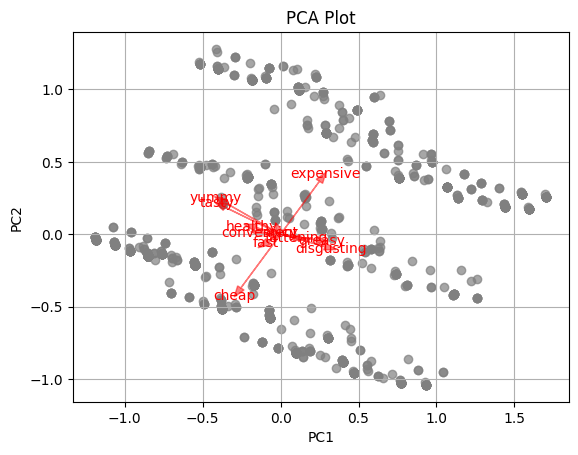

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.grid(True)

rotation = pca.components_.T 
scalings = np.sqrt(pca.explained_variance_)

for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0, rotation[i, 0] * scalings[0], rotation[i, 1] * scalings[1],
              color='r', alpha=0.5, head_width=0.05)
    plt.text(rotation[i, 0] * scalings[0] * 1.15, rotation[i, 1] * scalings[1] * 1.15,
             feature, color='r', ha='center', va='center')

plt.show()


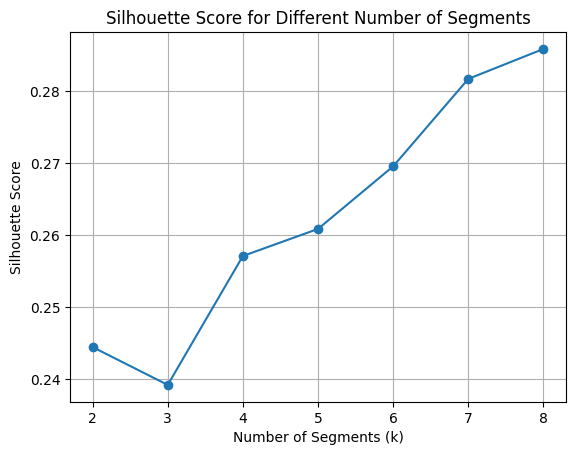

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

np.random.seed(1234)

k_range = range(2, 9)
scores = []

for k in k_range:
    kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for _ in range(10)]

    silhouette_scores = [silhouette_score(MD_x, model.labels_) for model in kmeans_models]
    best_score = np.max(silhouette_scores)
    scores.append(best_score)

plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Segments')
plt.grid(True)
plt.show()


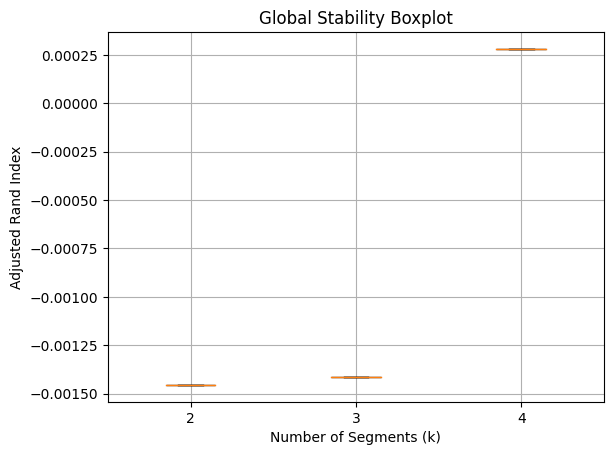

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Set seed for reproducibility
np.random.seed(1234)

# Define the range for number of clusters
k_range = range(2, 5)
n_bootstrap = 100

# Function to compute the adjusted Rand index
def compute_ari(original_labels, bootstrap_labels):
    return adjusted_rand_score(original_labels, bootstrap_labels)

# Store ARI scores for each k
ari_scores = {k: [] for k in k_range}

for k in k_range:
    # Fit KMeans on the original dataset
    original_kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
    original_labels = original_kmeans.labels_

    # Perform bootstrapping
    for _ in range(n_bootstrap):
        # Resample the data
        bootstrap_X = resample(MD_x, replace=True, random_state=1234)
        bootstrap_kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(bootstrap_X)
        bootstrap_labels = bootstrap_kmeans.labels_

        # Compute ARI for the bootstrap sample
        ari = compute_ari(original_labels, bootstrap_labels)
        ari_scores[k].append(ari)

# Create a list of ARI scores for each k to use in the boxplot
ari_scores_list = [ari_scores[k] for k in k_range]

# Plot a boxplot for the ARI scores
plt.boxplot(ari_scores_list, positions=list(k_range), patch_artist=True)
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Set seed for reproducibility
np.random.seed(1234)

# Define the range for number of clusters
k_range = range(2, 9)
n_init = 10

# Store the results
results = []

for k in k_range:
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, n_init=n_init, random_state=1234)
    gmm.fit(MD_x)

    # Calculate log-likelihood, AIC, BIC
    logLik = gmm.score(MD_x) * len(MD_x)
    aic = gmm.aic(MD_x)
    bic = gmm.bic(MD_x)

    # Append the results
    results.append({
        'k': k,
        'logLik': logLik,
        'AIC': aic,
        'BIC': bic,
        # ICL is approximated by BIC here since there's no direct ICL in sklearn
        'ICL': bic
    })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Print results
print(results_df)


   k        logLik           AIC           BIC           ICL
0  2  11147.820925 -21985.641850 -21167.027072 -21167.027072
1  3  14126.449712 -27786.899425 -26556.336565 -26556.336565
2  4  17513.541902 -34405.083804 -32762.572863 -32762.572863
3  5  22500.931691 -44223.863382 -42169.404358 -42169.404358
4  6  28522.042011 -56110.084021 -53643.676917 -53643.676917
5  7  29652.476457 -58214.952914 -55336.597727 -55336.597727
6  8  26714.810184 -52183.620368 -48893.317099 -48893.317099


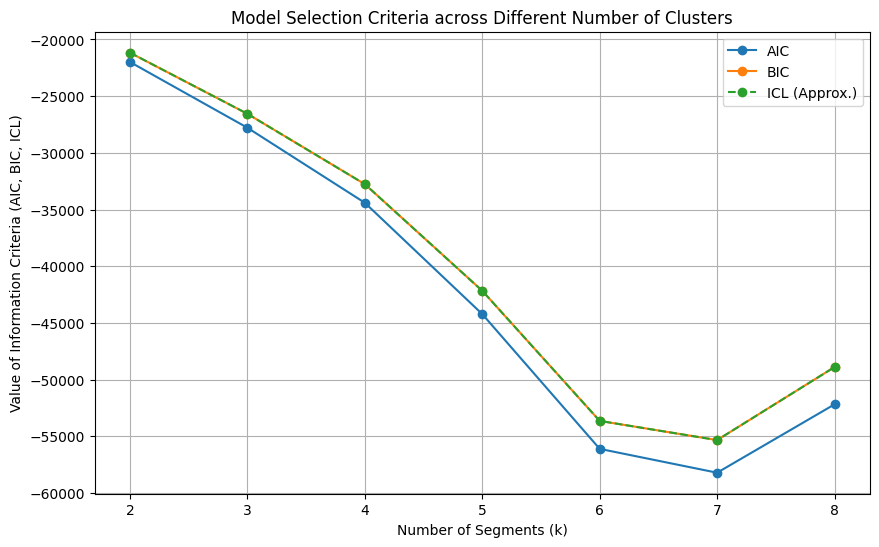

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results_df' contains the results from the previous step

# Plot the values of AIC, BIC, and ICL for different numbers of clusters (k)
plt.figure(figsize=(10, 6))

# Plot AIC
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC')

# Plot BIC
plt.plot(results_df['k'], results_df['BIC'], marker='o', label='BIC')

# Plot ICL (approximated by BIC in this case)
plt.plot(results_df['k'], results_df['ICL'], marker='o', label='ICL (Approx.)', linestyle='--')

plt.xlabel('Number of Segments (k)')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Model Selection Criteria across Different Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Set seed for reproducibility
np.random.seed(1234)

# Fit KMeans with 4 clusters
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MD_x)

# Fit Gaussian Mixture Model with 4 components
gmm_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_clusters = gmm_model.fit_predict(MD_x)

# Create a contingency table (confusion matrix) between k-means and mixture model clusters
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)


mixture    0    1    2    3
kmeans                     
0         31   51  268   14
1          4  214    0   22
2        143    0  362   28
3          0    3    0  313


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Set seed for reproducibility
np.random.seed(1234)

# Step 1: Fit KMeans with 4 clusters
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MD_x)

# Step 2: Use k-means clusters as the initial cluster labels for GMM
gmm_model = GaussianMixture(n_components=4, n_init=10, random_state=1234, init_params='random')
gmm_model.fit(MD_x)
gmm_clusters = gmm_model.predict(MD_x)

# Step 3: Create a contingency table to compare the clusters
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)


mixture    0   1    2   3
kmeans                   
0         61   9  258  36
1         24  18  112  86
2        221  11  280  21
3         85  11  177  43


In [ ]:
# Calculate log-likelihood for the GMM model fitted with k-means initialization
log_likelihood_m4a = gmm_model.score(MD_x) * len(MD_x)

# Refit the GMM without using k-means initialization to simulate the other model
gmm_model_no_init = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_model_no_init.fit(MD_x)
log_likelihood_m4 = gmm_model_no_init.score(MD_x) * len(MD_x)

# Print the log-likelihoods
print(f"Log Likelihood (MD.m4a): {log_likelihood_m4a:.3f}")
print(f"Log Likelihood (MD.m4): {log_likelihood_m4:.3f}")


Log Likelihood (MD.m4a): 24934.712
Log Likelihood (MD.m4): 17513.542


In [ ]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Define the mapping from textual values to numeric values
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Map the 'Like' column to numeric values
mcdonalds['Like_numeric'] = mcdonalds['Like'].map(like_mapping)

# Count the occurrences of each unique value in the 'Like' column
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print("Original 'Like' counts:")
print(like_counts)

# Create the 'Like.n' column
mcdonalds['Like.n'] = 6 - mcdonalds['Like_numeric']

# Count the occurrences of each unique value in the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()
print("\n'Like.n' counts:")
print(like_n_counts)


Original 'Like' counts:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64

'Like.n' counts:
Like.n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the column names for the features (first 11 columns)
feature_names = mcdonalds.columns[:11]

# Create the formula string
formula_str = 'Like.n ~ ' + ' + '.join(feature_names)

# Print the formula string
print("Formula String:")
print(formula_str)


Formula String:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Set seed for reproducibility
np.random.seed(1234)

# Perform Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=2, random_state=1234)
clusters = gmm.fit_predict(MD_x)

# Add cluster labels to the dataframe
mcdonalds['Cluster'] = clusters

# Print cluster sizes
cluster_sizes = mcdonalds['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
Cluster
0    545
1    908
Name: count, dtype: int64


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Define a mapping for the 'Like' column
rating_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Convert 'Like' column using the mapping
mcdonalds['Like'] = mcdonalds['Like'].map(rating_mapping)

# Create the target variable 'Like.n'
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(MD_x)
y = mcdonalds['Like.n']

# Fit the OLS regression model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          4.03e-296
Time:                        06:32:16   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9242      0.280     28.350      0.0

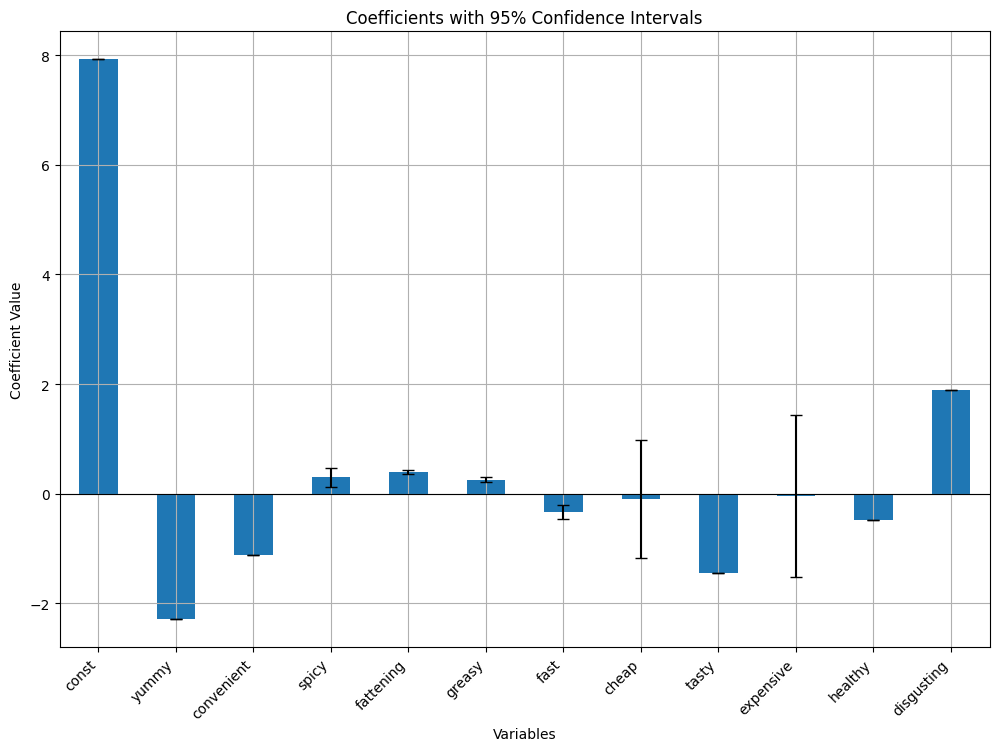

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Define a mapping for the 'Like' column
rating_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Convert 'Like' column using the mapping
mcdonalds['Like'] = mcdonalds['Like'].map(rating_mapping)

# Create the target variable 'Like.n'
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(MD_x)
y = mcdonalds['Like.n']

# Fit the OLS regression model
model = sm.OLS(y, X)
result = model.fit()

# Extract coefficients and p-values
coefficients = result.params
p_values = result.pvalues

# Plot the coefficients with significance
plt.figure(figsize=(12, 8))
coefficients.plot(kind='bar', yerr=p_values * 1.96, capsize=4)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Coefficients with 95% Confidence Intervals')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


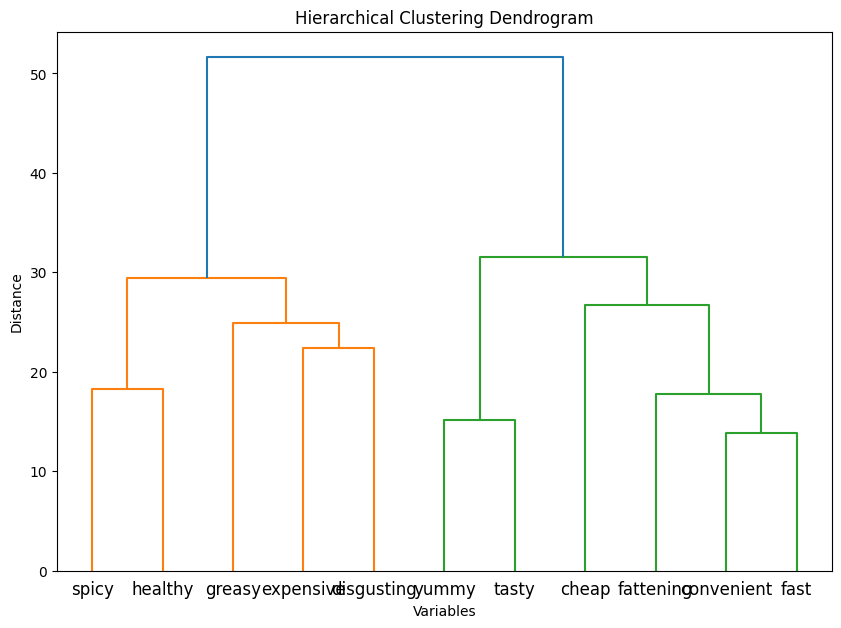

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Transpose the data matrix
MD_x_T = MD_x.T

# Compute the distance matrix
distance_matrix = pdist(MD_x_T, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=MD_x.columns.tolist(), orientation='top', distance_sort='ascending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()


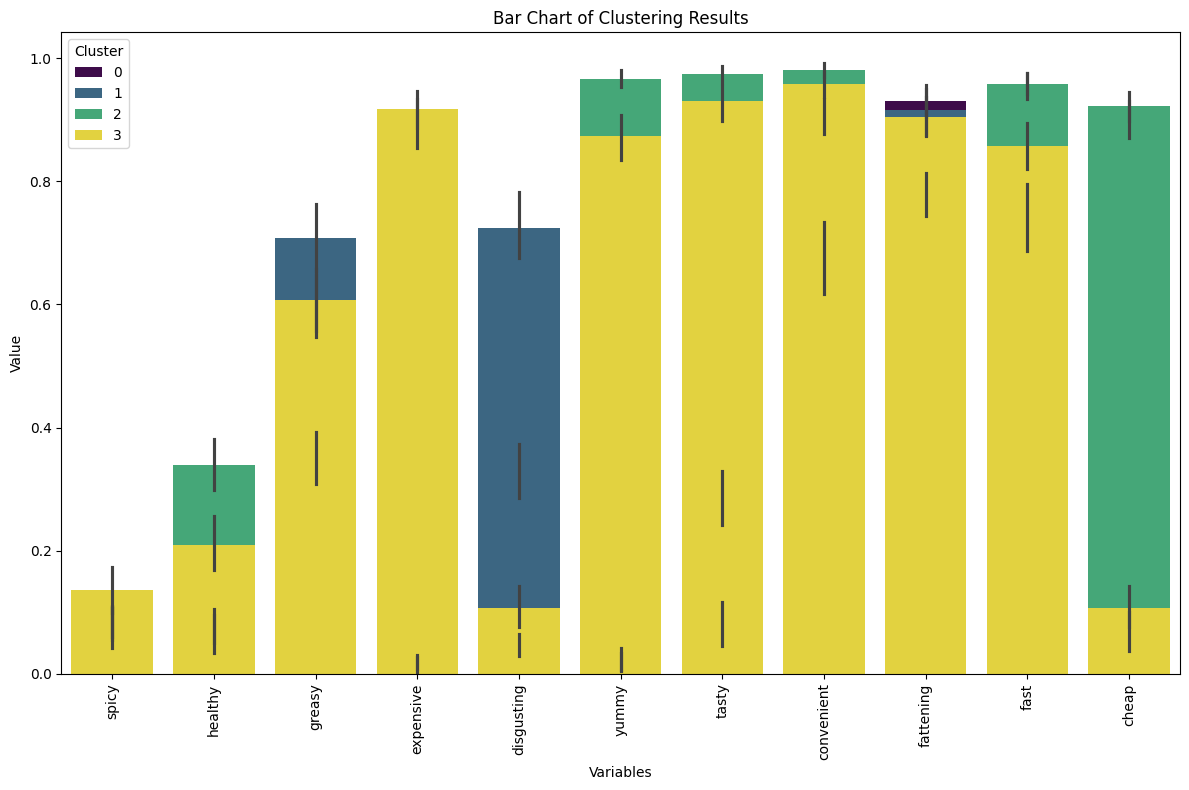

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4 (as per MD.k4)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
clusters = kmeans.labels_

# Perform hierarchical clustering
MD_x_T = MD_x.T
distance_matrix = pdist(MD_x_T, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')

# Get the order of variables from hierarchical clustering
dendro_order = fcluster(linkage_matrix, t=4, criterion='maxclust')
dendro_order = np.argsort(dendro_order)

# Create a DataFrame for easier plotting
df = pd.DataFrame(MD_x, columns=MD_x.columns)
df['Cluster'] = clusters

# Reorder the DataFrame columns based on hierarchical clustering
ordered_columns = np.array(MD_x.columns)[dendro_order]
df = df[ordered_columns.tolist() + ['Cluster']]

# Reshape the DataFrame for plotting
df_melted = df.melt(id_vars='Cluster')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='variable', y='value', hue='Cluster', dodge=False, palette='viridis')
plt.title('Bar Chart of Clustering Results')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


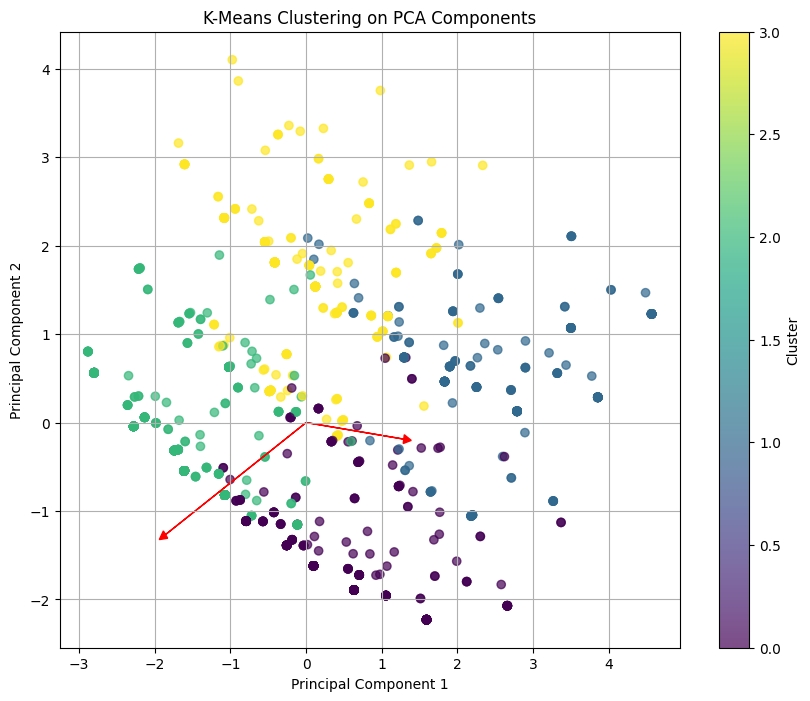

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Perform K-means clustering with k=4 (as per MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
clusters = kmeans.labels_

# Create a DataFrame for plotting
df_pca = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Plot PCA projection with K-means clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Components')

# Optionally add PCA component vectors (i.e., projection axes)
for i in range(pca.components_.shape[0]):
    plt.arrow(0, 0, pca.components_[i, 0] * np.max(MD_pca[:, 0]),
              pca.components_[i, 1] * np.max(MD_pca[:, 1]),
              color='r', head_width=0.1, head_length=0.1)

plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


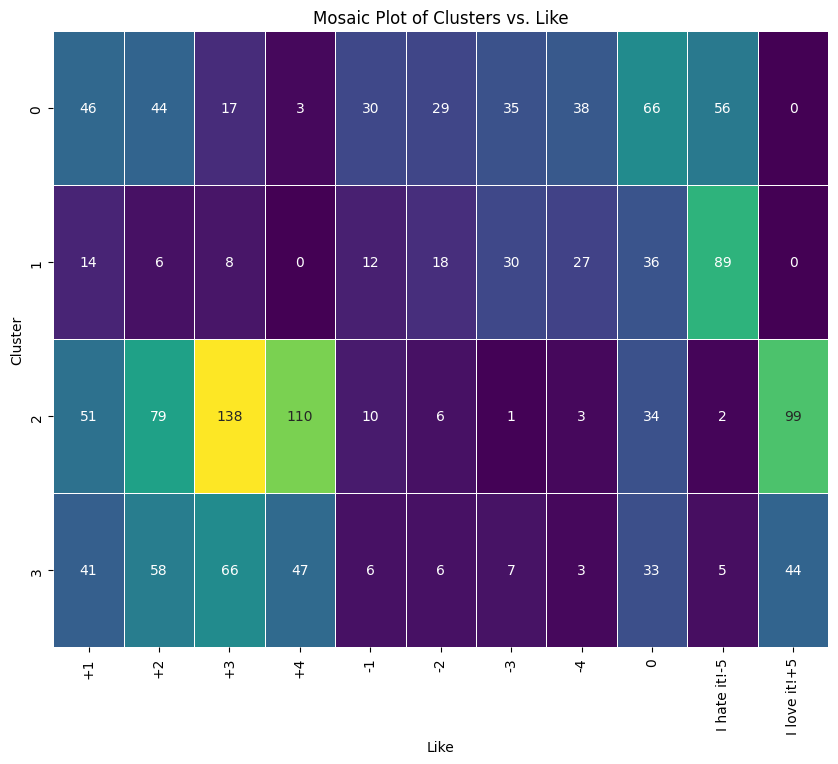

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4 (as per MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Create a DataFrame for the Like variable
mcdonalds['Cluster'] = k4

# Generate a cross-tabulation table
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=.5)
plt.xlabel('Like')
plt.ylabel('Cluster')
plt.title('Mosaic Plot of Clusters vs. Like')
plt.show()


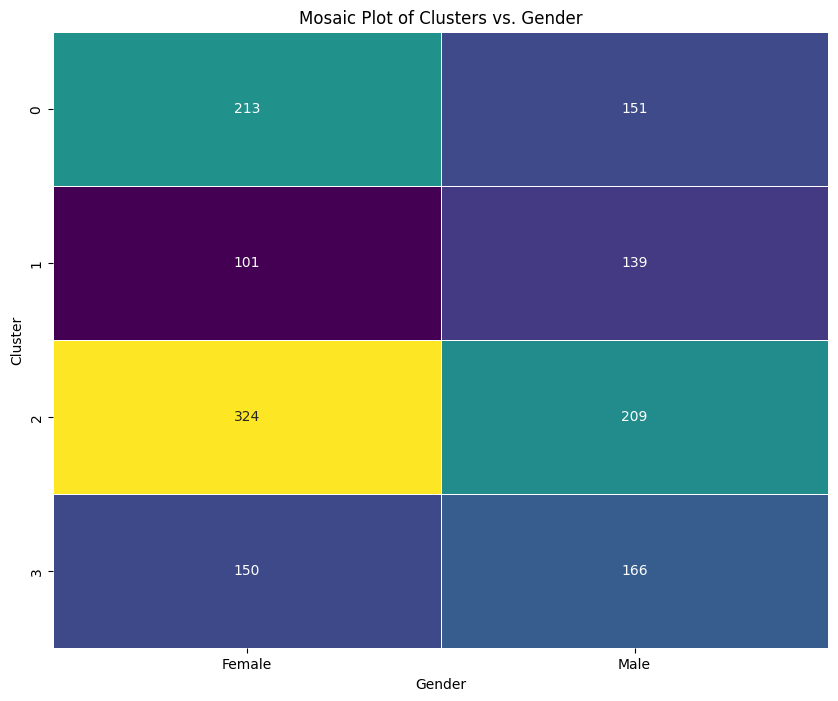

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4 (as per MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Generate a cross-tabulation table between clusters and Gender
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'])

# Plot the mosaic plot using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=.5)
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.title('Mosaic Plot of Clusters vs. Gender')
plt.show()


<ipython-input-27-8673f9f4ce01>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=mcdonalds, notch=True, width=0.5, palette='viridis')


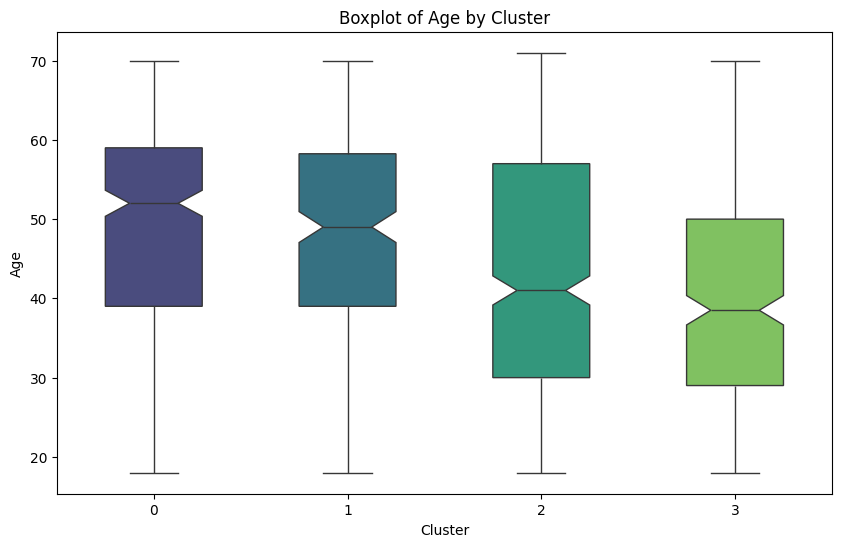

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the relevant columns (first 11 columns) and convert "Yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4 (as per MD.k4)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mcdonalds, notch=True, width=0.5, palette='viridis')

# Add titles and labels
plt.title('Boxplot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


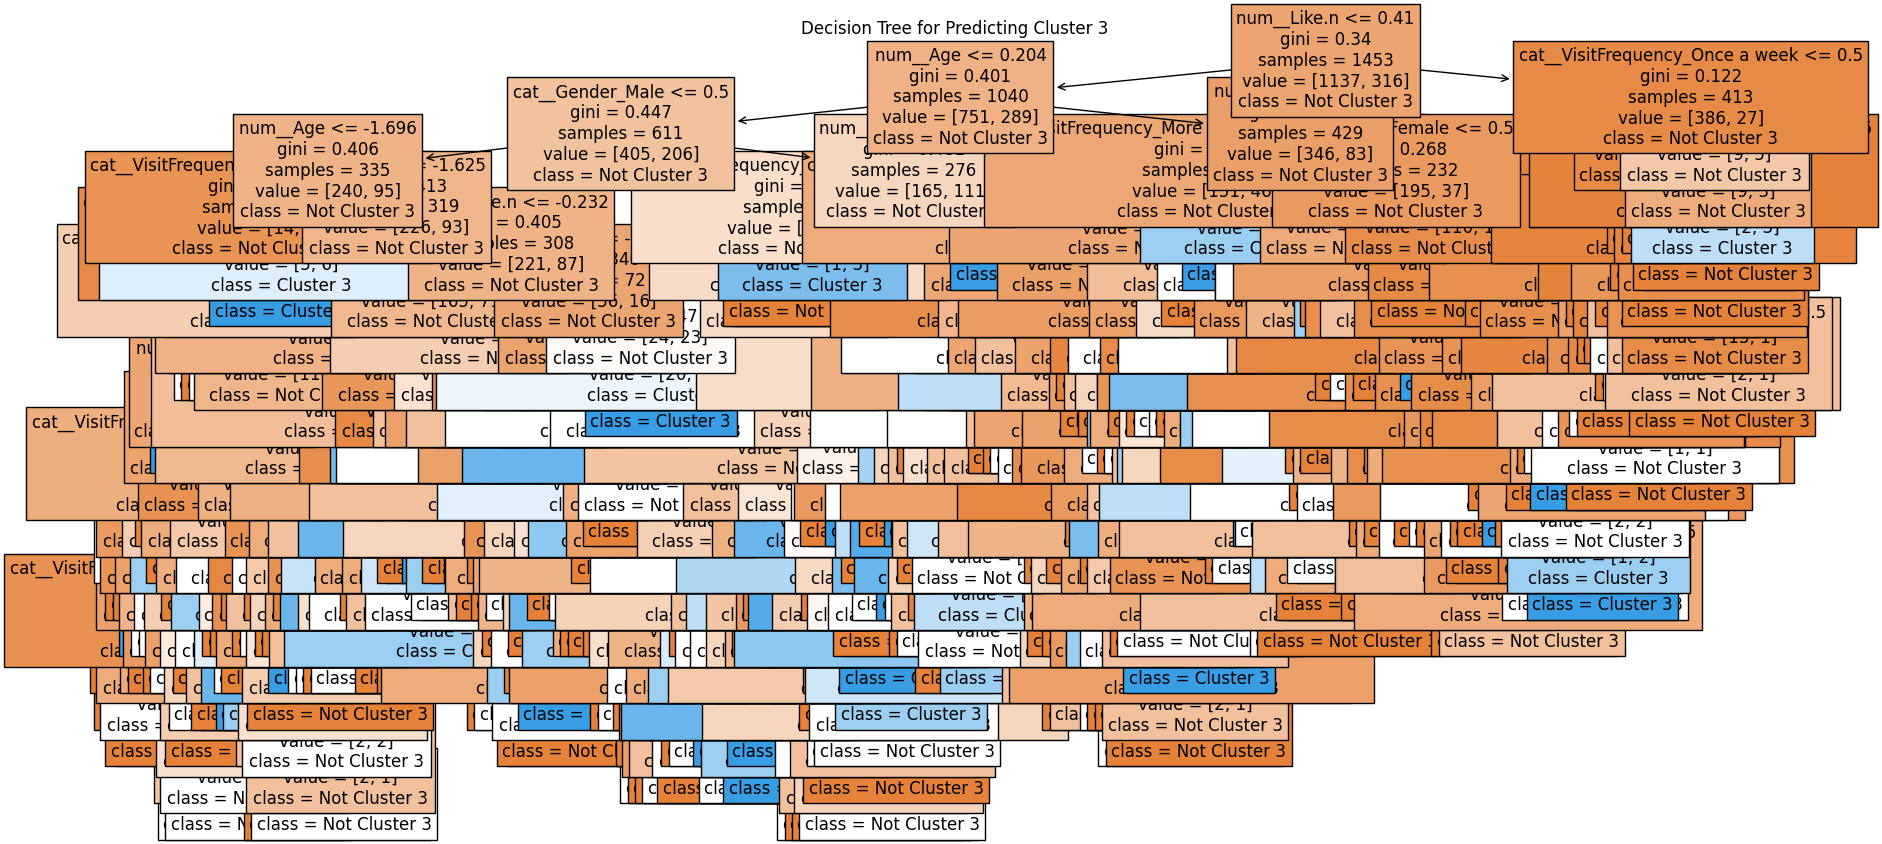

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Like' column to numeric if it contains categorical data
if 'Like' in mcdonalds.columns:
    # Convert 'Like' column to numeric (ensure it's in the correct format)
    mcdonalds['Like'] = mcdonalds['Like'].replace({
        'I hate it!-5': -5, '-4': -4, '-3': -3, '-2': -2,
        '-1': -1, '0': 0, '+1': 1, '+2': 2,
        '+3': 3, '+4': 4, 'I love it!+5': 5
    })

    # Create the target variable 'Like.n'
    mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Perform K-means clustering with k=4
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
MD_x = (MD_x == "Yes").astype(int)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Prepare the features and target variable
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
X = mcdonalds[features]
y = (mcdonalds['Cluster'] == 3).astype(int)  # Target: True if Cluster == 3, else False

# Define a column transformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Like.n', 'Age']),  # Scaling numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['VisitFrequency', 'Gender'])  # One-hot encoding categorical features
    ])

# Apply transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Fit the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=1234)
tree_clf.fit(X_transformed, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=preprocessor.get_feature_names_out(), class_names=['Not Cluster 3', 'Cluster 3'], filled=True, fontsize=12)
plt.title('Decision Tree for Predicting Cluster 3')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'VisitFrequency' to numeric (if it is not already)
# Assume 'VisitFrequency' is categorical; convert it using a mapping or encoding
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Perform K-means clustering with k=4
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
MD_x = (MD_x == "Yes").astype(int)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Calculate the mean VisitFrequency for each cluster
visit_means = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()

print(visit_means)


Cluster
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'VisitFrequency' to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Extract the relevant columns and convert "Yes" to 1 and others to 0
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Calculate the mean VisitFrequency for each cluster
visit_means = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()

# Print the results
print(visit_means)


Cluster
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Like' to numeric and create 'Like.n'
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Extract the relevant columns and convert "Yes" to 1 and others to 0
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Calculate the mean Like.n for each cluster
like_means = mcdonalds.groupby('Cluster')['Like.n'].mean()

# Print the results
print(like_means)


Cluster
0    6.480519
1    7.298013
2    3.625000
3    4.157303
Name: Like.n, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Like' to numeric and create 'Like.n'
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Extract the relevant columns and convert "Yes" to 1 and others to 0
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
MD_x = (MD_x == "Yes").astype(int)

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Calculate the proportion of females in each cluster
mcdonalds['is_female'] = (mcdonalds['Gender'] == "Female").astype(int)
female_proportion = mcdonalds.groupby('Cluster')['is_female'].mean()

# Print the results
print(female_proportion)


Cluster
0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: is_female, dtype: float64


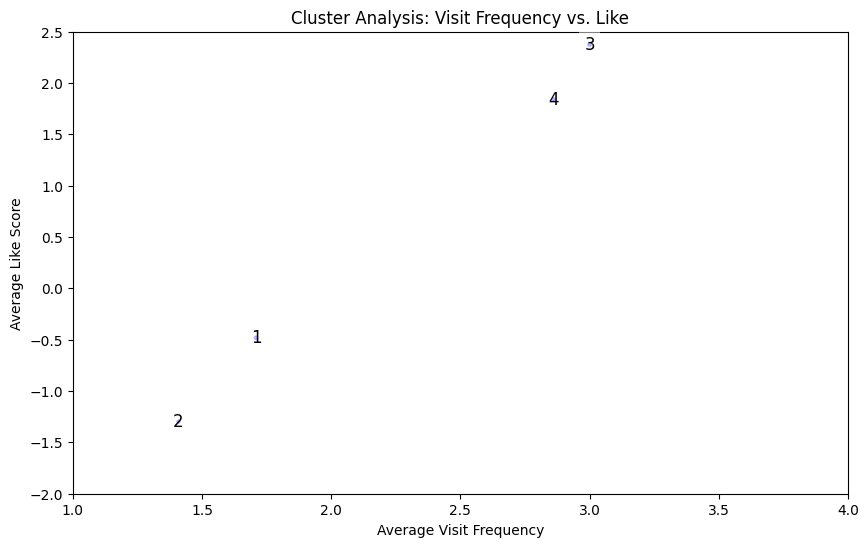

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Assuming the McDonald's dataset is loaded into a pandas DataFrame called `mcdonalds`
mcdonalds = pd.read_csv('mcdonalds.csv')

# Mapping VisitFrequency to numeric values
frequency_map = {
    "Never": 0,
    "Once a year": 1,
    "Every three months": 2,
    "Once a month": 3,
    "Once a week": 4,
    "More than once a week": 5
}
mcdonalds['VisitFrequencyNumeric'] = mcdonalds['VisitFrequency'].map(frequency_map)

# Perform K-means clustering with k=4
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)  # Assuming the first 11 columns are the relevant features
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
k4 = kmeans.labels_

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = k4

# Convert Gender to numeric (Female = 1, Male = 0)
mcdonalds['Gender_numeric'] = (mcdonalds['Gender'] == "Female").astype(int)
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')


# Calculate mean values per cluster
visit = mcdonalds.groupby('Cluster')['VisitFrequencyNumeric'].mean().values
like = mcdonalds.groupby('Cluster')['Like'].mean().values
female_proportion = mcdonalds.groupby('Cluster')['Gender_numeric'].mean().values

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot where the size of each point is proportional to the female proportion
plt.scatter(visit, like, s=10 * female_proportion, alpha=0.5, color='blue')

# Add text labels for each cluster
for i in range(len(visit)):
    plt.text(visit[i], like[i], str(i + 1), fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Set axis limits to match the R plot
plt.xlim(1, 4)
plt.ylim(-2, 2.5)

# Set axis labels
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like Score')

# Add a title
plt.title('Cluster Analysis: Visit Frequency vs. Like')

# Show the plot
plt.show()
